In [1]:
%%capture
!pip install netcdf4
!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#abriendo los archivos netcdf
ruta_tmax = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/PISCO_temperature/tx/PISCOdtx_v1.1.nc"
PISCO_tmax = xr.open_dataset(ruta_tmax)
ruta_tmin = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/PISCO/piscov1p1(tmin).nc"
PISCO_tmin = xr.open_dataset(ruta_tmin, decode_times=False)
PISCO_tmin = PISCO_tmin.rename({"X":"longitude","Y":"latitude","T":"time"})
PISCO_tmin["time"] = pd.date_range(start="1981-01-01",freq="1M", periods= 432)

#ANOMALIA TMAX
## tmax 1981-2010
tmax_filtro=PISCO_tmax.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
tmax_filtro=tmax_filtro.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
tmax_acum = tmax_filtro.tx.mean(dim='time')
## tmax 1981-2016
tmax_anual=PISCO_tmax.sel(time=slice('1981-06-01T00:00:00.000000000','2016-05-31T12:00:00.000000000'))
tmax_anual=tmax_anual.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
tmax_anual = tmax_anual.tx.groupby('time.year').mean(dim='time')
## anomalia tmax
tmax_anom = (tmax_anual - tmax_acum).to_dataset(name="tx")
anom_tx_df = tmax_anom.mean(dim=("latitude","longitude")).to_dataframe()

# ANOM TMIN
## tmin 1981-2010
tmin_filtro=PISCO_tmin.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
tmin_filtro=tmin_filtro.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
tmin_acum = tmin_filtro.tmin.mean(dim='time')
## tmin 1981-2016
tmin_anual=PISCO_tmin.sel(time=slice('1981-06-01T00:00:00.000000000','2016-05-31T12:00:00.000000000'))
tmin_anual=tmin_anual.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
tmin_anual = PISCO_tmin.tmin.groupby('time.year').mean(dim='time')
## anom tmin
tmin_anom = (tmin_anual - tmin_acum).to_dataset(name="tmin")
anom_tmin_df = tmin_anom.mean(dim=("latitude","longitude")).to_dataframe()

#AJUSTANDO COLORES
## anom tmax
anom_pos_tx=anom_tx_df.copy()
anom_pos_tx[anom_pos_tx["tx"]<0]=np.NaN
anom_neg_tx=anom_tx_df.copy()
anom_neg_tx[anom_neg_tx["tx"]>0]=np.NaN
## anom t min
anom_pos_tmin=anom_tmin_df.copy()
anom_pos_tmin[anom_pos_tmin["tmin"]<0]=np.NaN 
anom_neg_tmin=anom_tmin_df.copy()
anom_neg_tmin[anom_neg_tmin["tmin"]>0]=np.NaN 

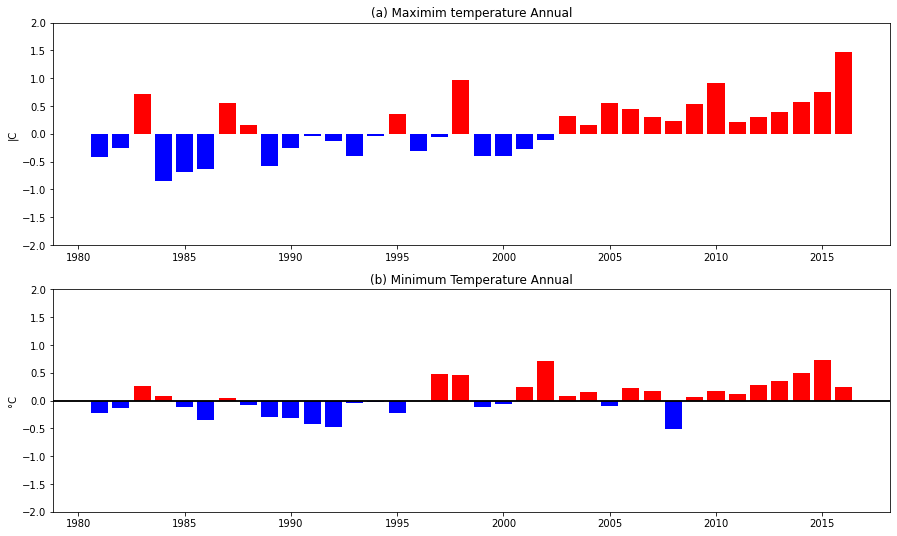

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(15, 9))
#Anom tmax
ax = axs[0]
x= np.arange(1981,2017,1)
y_pos=anom_pos_tx["tx"].to_numpy()
y_neg=anom_neg_tx["tx"].to_numpy()
ax.bar(x,y_pos, color="red")
ax.bar(x,y_neg, color="blue")
ax.set_ylabel("|C")
ax.set_xlabel("")
ax.set_ylim(-2,2)
ax.set_title("(a) Maximim temperature Annual")
plt.axhline(y=0, color='black', linestyle='-')

#anom tmin
ax2 = axs[1]
x2= np.arange(1981,2017,1)
y2_pos=anom_pos_tmin["tmin"].to_numpy()
y2_neg=anom_neg_tmin["tmin"].to_numpy()
ax2.bar(x2,y2_pos, color="red")
ax2.bar(x2,y2_neg, color="blue")
ax2.set_ylabel("°C")
ax2.set_xlabel("")
ax2.set_ylim(-2,2)
ax2.set_title("(b) Minimum Temperature Annual")
plt.axhline(y=0, color='black', linestyle='-')
fig.savefig("Figura6.png")